In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from random import sample
from sklearn import preprocessing

# Question 1.1

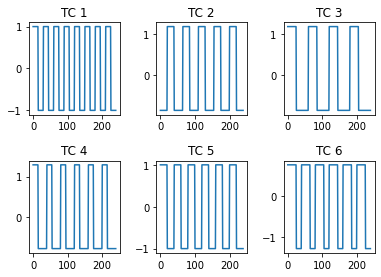

In [2]:
# declare the vectors
AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
dur_of_ones = [15, 20, 25, 15, 20, 25]

# create empty TC
TC = np.zeros((240, 6))

# create the six temporal sources
for av, iv, ones, column in zip(AV, IV, dur_of_ones, TC.T):
    while(av < 240):
        stop_one = av + ones
        column[av:stop_one] = 1
        av = av + iv
    

# standardise the temporal source
for i in range(0, 6):
    TC.T[i] = (TC.T[i] - TC.T[i].mean())/TC.T[i].std()
        
    
# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

# draw the 6 subplots of TC
for n in range(0, 6):
    if (n < 3):
        ax[0, n].plot(TC.T[n])
        ax[0, n].set_title('TC ' + str(n+1))
    else:
        ax[1, n-3].plot(TC.T[n])
        ax[1, n-3].set_title('TC ' + str(n+1))

    
plt.show()
fig.savefig('./plots/question_1a')


# Question 1.2

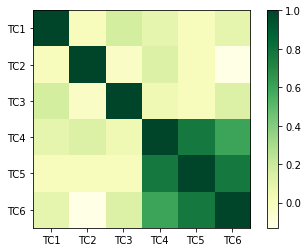

In [3]:
# plot the correlation matrix
labels = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']
values = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 1)
image = ax.imshow(np.corrcoef(TC.T), cmap='YlGn')

# add color bar
fig.colorbar(image)

# set the labels
ax.set_xticks(values)
ax.set_xticklabels(labels)
ax.set_yticks(values)
ax.set_yticklabels(labels)

fig.savefig('./plots/question_1b')
plt.show()



# Question 1.3

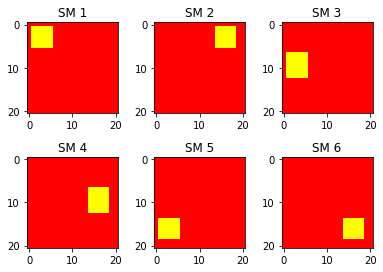

In [4]:
# create the tmpSM array as required
count = 6
tmpSM = np.zeros((count, 21, 21))

tmpSM[0][1:6, 1:6] = 1
tmpSM[1][1:6, 14:19] = 1
tmpSM[2][7:13, 1:6] = 1
tmpSM[3][7:13, 14:19] = 1
tmpSM[4][14:19, 1:6] = 1
tmpSM[5][14:19, 14:19] = 1

# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# draw the 6 subplots of SM
for n in range(0, count): 
    if (n < 3):
        ax[0, n].imshow(tmpSM[n], cmap='autumn')
        ax[0, n].set_title('SM ' + str(n+1))
    else:
        ax[1, n-3].imshow(tmpSM[n], cmap='autumn')
        ax[1, n-3].set_title('SM ' + str(n+1))

    
plt.show()
fig.savefig('./plots/question_1c')


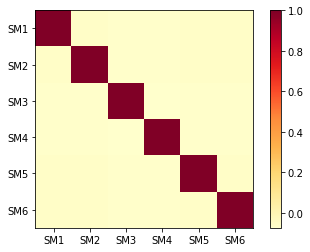

In [5]:
# create 6x441 SM from tmpSM
SM = tmpSM.reshape(6,441, order='F')

# plot the correlation matrix
SM_labels = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']
values = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 1)
SM_image = ax.imshow(np.corrcoef(SM), cmap='YlOrRd')

# add color bar
fig.colorbar(SM_image)

# set the labels
ax.set_xticks(values)
ax.set_xticklabels(SM_labels)
ax.set_yticks(values)
ax.set_yticklabels(SM_labels)

fig.savefig('./plots/question_1b2')
plt.show()

# Question 1.4

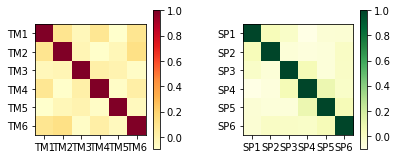

In [6]:
# set the variance for the noises
var_temp = 0.25
var_spa = 0.015
mean = 0

# generate the gaussian noises
noise_temp = np.random.normal(mean, math.sqrt(var_temp), 240*6).reshape(240, 6)
noise_spa = np.random.normal(mean, math.sqrt(var_spa), 6*441).reshape(6, 441)

# plot the correlation matrix for noises
TM_labels = ['TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6']
SP_labels = ['SP1', 'SP2', 'SP3', 'SP4', 'SP5', 'SP6']
values = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 2)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

# plot the matrix
noise_temp_image = ax[0].imshow(np.corrcoef(noise_temp.T), cmap='YlOrRd')
noise_spa_image = ax[1].imshow(np.corrcoef(noise_spa), cmap='YlGn')

# add color bar
fig.colorbar(noise_temp_image, ax=ax[0], shrink=0.6)
fig.colorbar(noise_spa_image, ax=ax[1], shrink=0.6)

# set the labels for temporal sources
ax[0].set_xticks(values)
ax[0].set_xticklabels(TM_labels)
ax[0].set_yticks(values)
ax[0].set_yticklabels(TM_labels)

# set the labels for spatial sources
ax[1].set_xticks(values)
ax[1].set_xticklabels(SP_labels)
ax[1].set_yticks(values)
ax[1].set_yticklabels(SP_labels)

plt.show()
fig.savefig('./plots/corr_matrix_1.4.png')


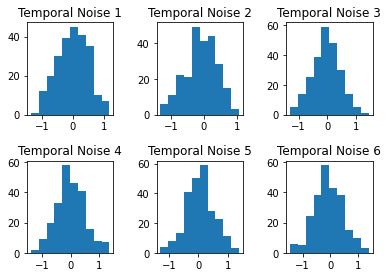

In [7]:
# plot histogram for temporal noise sources
# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

# draw the 6 subplots of temporal noise histogram
for n in range(0, 6): 
    if (n < 3):
        ax[0, n].hist(noise_temp.T[n])
        ax[0, n].set_title('Temporal Noise ' + str(n+1))
    else:
        ax[1, n-3].hist(noise_temp.T[n])
        ax[1, n-3].set_title('Temporal Noise ' + str(n+1))

fig.savefig('./plots/temporal_hist_1.4.png')
plt.show()

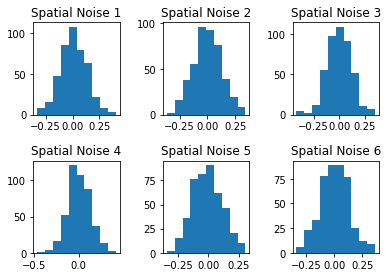

In [8]:
# plot histogram for spatial noise sources
# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

# draw the 6 subplots of spatial noise histogram
for n in range(0, 6): 
    if (n < 3):
        ax[0, n].hist(noise_spa[n])
        ax[0, n].set_title('Spatial Noise ' + str(n+1))
    else:
        ax[1, n-3].hist(noise_spa[n])
        ax[1, n-3].set_title('Spatial Noise ' + str(n+1))

fig.savefig('./plots/spatial_hist_1.4.png')
plt.show()

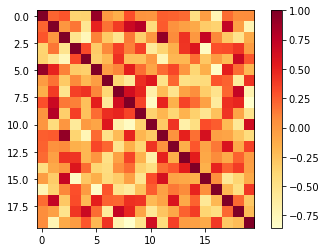

In [9]:
# get the product of 2 noises
mul_noises = np.matmul(noise_temp, noise_spa)

# plot the correlation matrix
fig, ax = plt.subplots()
mul_noises_image = ax.imshow(np.corrcoef(mul_noises.T)[10:30, 10:30], cmap='YlOrRd')

# add colourbar and title
fig.colorbar(mul_noises_image, ax=ax)


fig.savefig('./plots/noises_product_1.4.png')

# Question 1.5

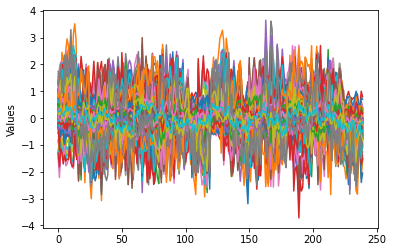

In [10]:
# generate the synthetic dataset
X = np.matmul((TC + noise_temp), (SM + noise_spa))

# generate TC * spatial noises and temporal noises * SM
TC_noise_spa = np.matmul(TC, noise_spa)
noise_temp_SM = np.matmul(noise_temp, SM)

# randomly select 120 variables
range_of_index = [i for i in range(0, X.shape[1])]
sample_index = sample(range_of_index, 120)

fig, ax = plt.subplots()

# plot the time series plot
ax.plot(np.arange(0,240), X.T[sample_index[0]])
sample_index.pop(0)

for i in sample_index:
    ax.plot(X.T[i])
    
# set the labels
ax.set_ylabel('Values')

plt.show()
fig.savefig('./plots/timeseries_1.5.png')

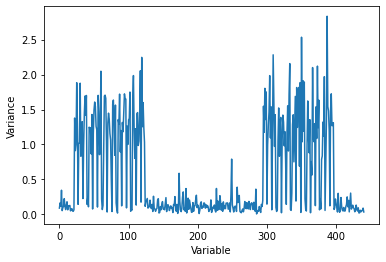

In [11]:
fig, ax = plt.subplots()

# plot the variance of all 441 variables
ax.plot(np.arange(0,441), np.var(X, axis=0))

# set x and y labels
plt.ylabel('Variance')
plt.xlabel('Variable')

fig.savefig('./plots/variance_1.5.png')

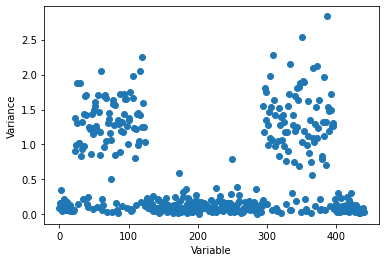

In [12]:
fig, ax = plt.subplots()

# plot the variance of all 441 variables
ax.scatter(np.arange(0,441), np.var(X, axis=0))

# set x and y labels
plt.ylabel('Variance')
plt.xlabel('Variable')

fig.savefig('./plots/variance_1.5.png')

In [13]:
# standardise X
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
# standardise X
#for i in range(0, X.shape[1]):
    #X[:, i] = (X[:, i] - X[:, i].mean())/X[:, i].std()

# Question 2.1

In [14]:
# estimate A using least squares
D = TC
DTD = np.matmul(D.T, D)
DTD_inv = np.linalg.inv(DTD)
A_LSR = np.matmul(np.matmul(DTD_inv , D.T), X)

# retreive TCs in DLSR
D_LSR = np.matmul(X, A_LSR.T)


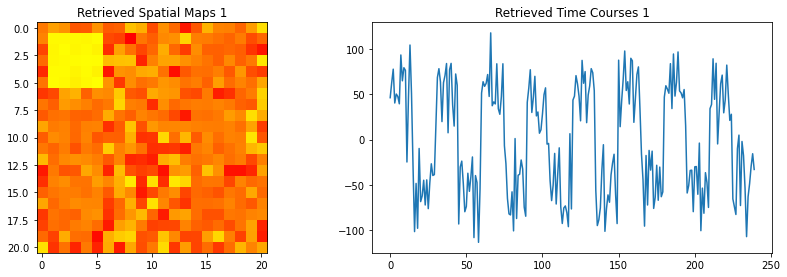

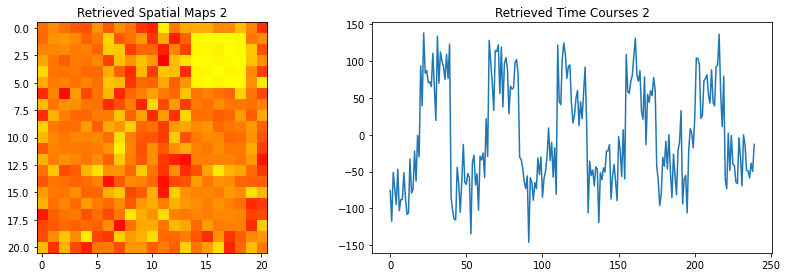

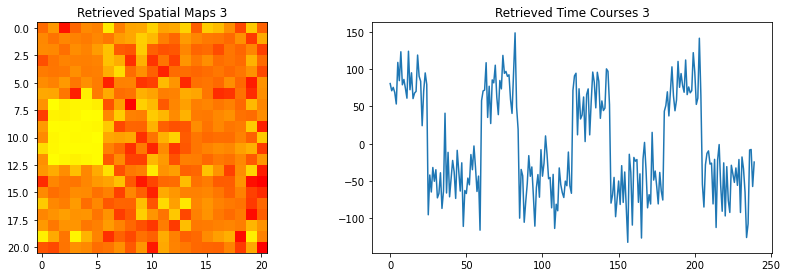

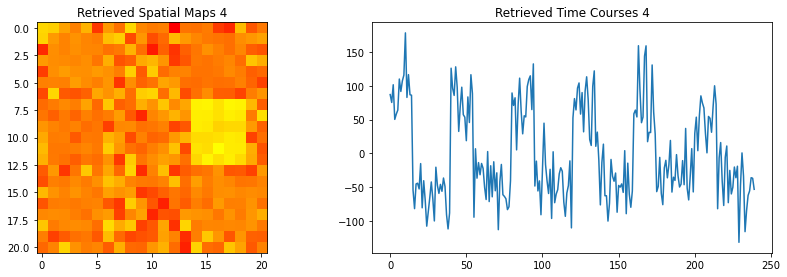

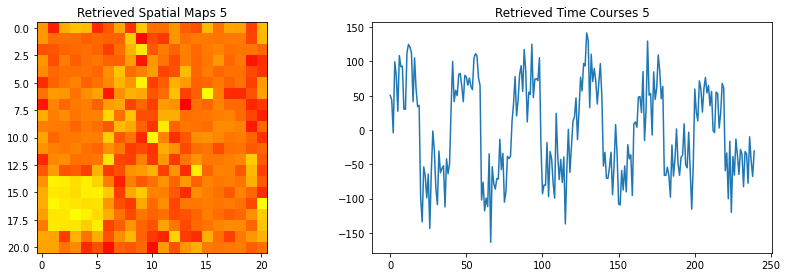

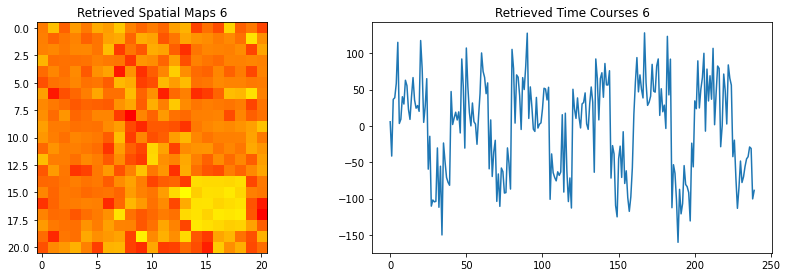

In [15]:
reshape_A_LSR = A_LSR.reshape(6, 21, 21, order='F')

for i in range(0, 6):

    fig, ax = plt.subplots(1, 2)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=2, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.1)

    # plot the retrieved sources
    ax[0].imshow(reshape_A_LSR[i], cmap='autumn')
    ax[0].set_title('Retrieved Spatial Maps ' + str(i+1))
    ax[1].plot(D_LSR.T[i])
    ax[1].set_title('Retrieved Time Courses ' + str(i+1))

    fig.savefig('./plots/retrieved_sources_' + str(i+1) + '.png', bbox_inches='tight')
    plt.show()

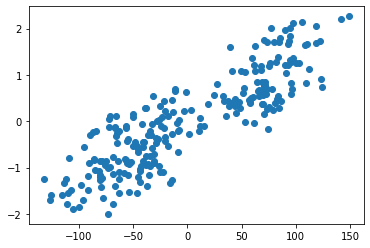

In [16]:
# plot a scatter plot between 3rd column of DSLR and 30th column of standardized X
fig, ax = plt.subplots()
ax.scatter(D_LSR.T[2], X.T[29])


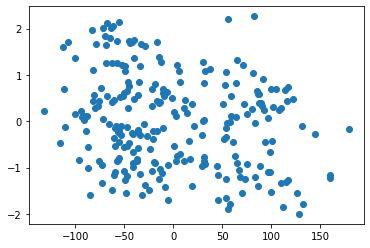

In [17]:
# plot a scatter plot between 4th column of DSLR and 30th column of standardized X
fig, ax = plt.subplots()
ax.scatter(D_LSR.T[3], X.T[29])


# Question 2.2

In [18]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

x, y = D, X
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.372
Config: {'alpha': 0.99}


In [19]:
V = 441
lambda_hat = 0.99*V

# estimate ARR and DRR
DTD_lambda_hat_inv = np.linalg.inv(DTD + lambda_hat*np.identity(6))
A_RR = np.matmul(np.matmul(DTD_lambda_hat_inv, D.T), X)
D_RR = np.matmul(X, A_RR.T)

c_TLSR = np.zeros(6)
# calculate the absolute correlation vectors of TC and DLSR
for i in range(0, 6):
    c_TLSR[i] = abs(np.corrcoef(TC.T[i], D_LSR.T[i])[0][1])
    
c_TRR = np.zeros(6)
# calculate the absolute correlation vectors of TC and DRR
for i in range(0, 6):
    c_TRR[i] = abs(np.corrcoef(TC.T[i], D_RR.T[i])[0][1])

# calculate the sum of the two correlation vectors
sum_c_TLSR = sum(c_TLSR)
sum_c_TRR = sum(c_TRR)

print('Sum of Correlation Vectors (LSR): ' + str(sum_c_TLSR))
print('Sum of Correlation Vectors (RR): ' + str(sum_c_TRR))

Sum of Correlation Vectors (LSR): 5.2356790086728715
Sum of Correlation Vectors (RR): 5.382763570396323


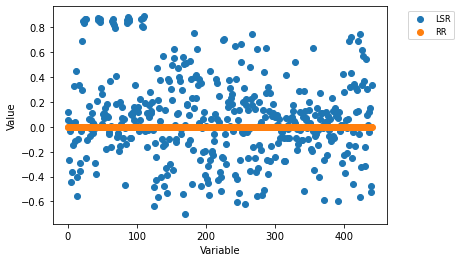

In [20]:
fontP = FontProperties()
fontP.set_size('small')

lambda_ = 1000
new_lambda_hat = 1000*441

# estimate new ARR 
new_DTD_lambda_hat_inv = np.linalg.inv(DTD + new_lambda_hat*np.identity(6))
new_A_RR = np.matmul(np.matmul(new_DTD_lambda_hat_inv, D.T), X)

fig, ax = plt.subplots()

# plot the all 441 variables
ax.scatter(np.arange(0,441), A_LSR[0])
ax.scatter(np.arange(0,441), new_A_RR[0])
plt.legend(['LSR', 'RR'], bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)


# set x and y labels
plt.ylabel('Value')
plt.xlabel('Variable')


fig.savefig('./plots/2.2_vec.png')

# Question 2.3

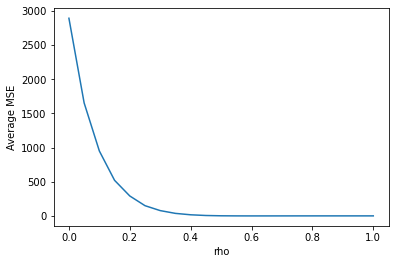

,average_mse
0.00,2893.353192
0.05,1654.121702
0.10,950.649071
0.15,521.205652
0.20,292.254611
0.25,150.214001
0.30,78.177653
0.35,37.498843
0.40,17.001356
0.45,6.608710


In [21]:
rho_list = np.arange(0, 1.05, 0.05)
N = 240
V = 441
x1 = x2 = 21
nsrcs = 6
DTD = np.matmul(TC, TC.T)
MSE_list = [0]*len(rho_list)
rho_ind = 0

for rho in rho_list:
    # repeat the process for 10 iterations
    for iteration in range(0, 10):
        
        # generate the gaussian noises
        noise_temp = np.random.normal(mean, math.sqrt(var_temp), 1440).reshape(240, 6)
        noise_spa = np.random.normal(mean, math.sqrt(var_spa), 2646).reshape(6, 441)

        # generate the synthetic dataset
        X = np.matmul((TC + noise_temp), (SM + noise_spa))

        # standardise X
        scaler = preprocessing.StandardScaler()
        X = scaler.fit_transform(X)

        # calculate Alr
        step = 1/(np.linalg.norm(np.matmul(TC, TC.T))*1.1)  
        thr = rho*N*step
        Ao = np.zeros((nsrcs, 1))
        A = np.zeros((nsrcs, 1))
        Alr = np.zeros((nsrcs, x1*x2))

        for k in range(0, x1*x2):
            A = Ao + step*(np.matmul(TC.T, X[:, k].reshape(240,1) - np.matmul(TC, Ao)))
            A = (1/(1+thr))*(np.sign(A)*np.maximum(np.repeat(0, nsrcs), abs(A)-thr)[:, 0].reshape(6, 1))
            for i in range(0, 10):
                Ao = A
                A = Ao + step*(np.matmul(TC.T, X[:, k].reshape(240,1) - np.matmul(TC, Ao)))
                A = (1/(1+thr))*(np.sign(A)*np.maximum(np.repeat(0, nsrcs), abs(A)-thr)[:, 0].reshape(6, 1))

            Alr[:, k] = A.reshape(6)

        # calculate DLR
        D_LR = np.matmul(X, Alr.T)

        # calculate MSE
        numerator = np.square(np.linalg.norm((X - np.matmul(D_LR, Alr)), 'fro'))
        MSE = numerator/(N*V)
        
        # append to the list
        MSE_list[rho_ind] += MSE
    
    rho_ind += 1

    
# calculate the average mse
average_MSE = [mse/10 for mse in MSE_list]

# plot the average mse of each rho
fig, ax = plt.subplots()
ax.plot(rho_list, average_MSE)
ax.set_xlabel('rho')
ax.set_ylabel('Average MSE')
fig.savefig('./plots/rho_2.3.png')
plt.show()

df = pd.DataFrame(data=average_MSE, index=rho_list, columns=['average_mse'])
df

# Question 2.4

In [22]:
selected_rho = 0.6
# calculate Alr
step = 1/(np.linalg.norm(np.matmul(TC, TC.T))*1.1)  
thr = selected_rho*N*step
Ao = np.zeros((nsrcs, 1))
A = np.zeros((nsrcs, 1))
Alr = np.zeros((nsrcs, x1*x2))

for k in range(0, x1*x2):
    A = Ao + step*(np.matmul(TC.T, X[:, k].reshape(240,1) - np.matmul(TC, Ao)))
    A = (1/(1+thr))*(np.sign(A)*np.maximum(np.repeat(0, nsrcs), abs(A)-thr)[:, 0].reshape(6, 1))
    for i in range(0, 10):
        Ao = A
        A = Ao + step*(np.matmul(TC.T, X[:, k].reshape(240,1) - np.matmul(TC, Ao)))
        A = (1/(1+thr))*(np.sign(A)*np.maximum(np.repeat(0, nsrcs), abs(A)-thr)[:, 0].reshape(6, 1))

    Alr[:, k] = A.reshape(6)

# calculate DLR
D_LR = np.matmul(X, Alr.T)

c_TRR = np.zeros(6)
# calculate the absolute correlation vectors of TC and DRR
for i in range(0, 6):
    c_TRR[i] = abs(np.corrcoef(TC.T[i], D_RR.T[i])[0][1])
    
c_SRR = np.zeros(6)
# calculate the absolute correlation vectors of SM and ARR
for i in range(0, 6):
    c_SRR[i] = abs(np.corrcoef(SM[i], A_RR[i])[0][1])
    
c_TLR = np.zeros(6)
# calculate the absolute correlation vectors of TC and DLR
for i in range(0, 6):
    c_TLR[i] = abs(np.corrcoef(TC.T[i], D_LR.T[i])[0][1])   
    
    
c_SLR = np.zeros(6)
# calculate the absolute correlation vectors of SM and ALR
for i in range(0, 6):
    c_SLR[i] = abs(np.corrcoef(SM[i], Alr[i])[0][1])

# calculate the sum of each correlation vectors
sum_c_SRR = sum(c_SRR)
sum_c_TRR = sum(c_TRR)
sum_c_TLR = sum(c_TLR)
sum_c_SLR = sum(c_SLR)

print('Sum of Correlation Vectors (SRR): ' + str(sum_c_SRR))
print('Sum of Correlation Vectors (TRR): ' + str(sum_c_TRR))
print('Sum of Correlation Vectors (SLR): ' + str(sum_c_SLR))
print('Sum of Correlation Vectors (TLR): ' + str(sum_c_TLR))

Sum of Correlation Vectors (SRR): 2.941356797587304
Sum of Correlation Vectors (TRR): 5.382763570396323
Sum of Correlation Vectors (SLR): 5.09037168948723
Sum of Correlation Vectors (TLR): 5.40397375073953


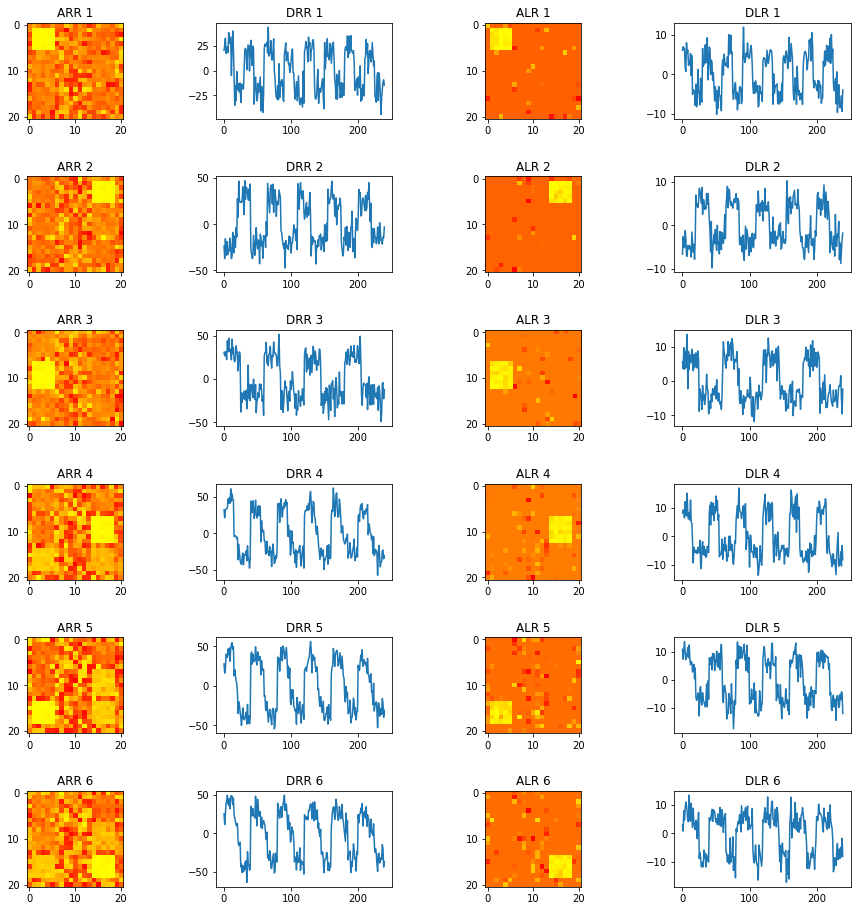

In [23]:
# plot the estimates of D and A
fig, ax = plt.subplots(6, 4, figsize=(15, 15))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.6)

reshaped_A_RR = A_RR.reshape(6, 21, 21, order='F')
reshaped_A_LR = Alr.reshape(6, 21, 21, order='F')

for i in range(0, 6):
    ax[i, 0].imshow(reshaped_A_RR[i], cmap='autumn')
    ax[i, 0].set_title('ARR ' + str(i+1))
    ax[i, 1].plot(D_RR.T[i])
    ax[i, 1].set_title('DRR ' + str(i+1))
    ax[i, 2].imshow(reshaped_A_LR[i], cmap='autumn')
    ax[i, 2].set_title('ALR ' + str(i+1))
    ax[i, 3].plot(D_LR.T[i])
    ax[i, 3].set_title('DLR ' + str(i+1))
    
fig.savefig('./plots/sources_2.4.png')
plt.show()

# Question 2.5

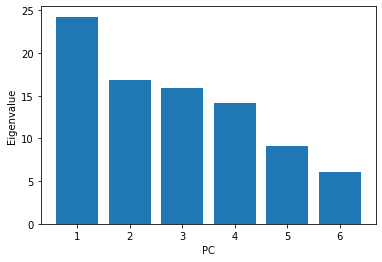

In [24]:
U, V, W = np.linalg.svd(TC)
u, v, w = np.linalg.svd(TC, full_matrices=0)
#Z = np.matmul(U, TC)
Z = u


# U i s  the  eigen  vector  of XX’  and  i t  i s  where you  obtain  ”Z”  f o r  your  case
# W i s  the  eigen  vector  of X’X,   V are  the  eigen  values

# calculate the PCs
#Sigma = np.zeros((240, 6), dtype=float)
#Sigma[:2, :2] = np.diag(v)

# plot the eigenvalues
fig, ax = plt.subplots()
ax.bar(np.arange(1, 7), V)

# set the x and y labels
ax.set_xlabel('PC')
ax.set_ylabel('Eigenvalue')

fig.savefig('./plots/eigenvalues_2.5.png')


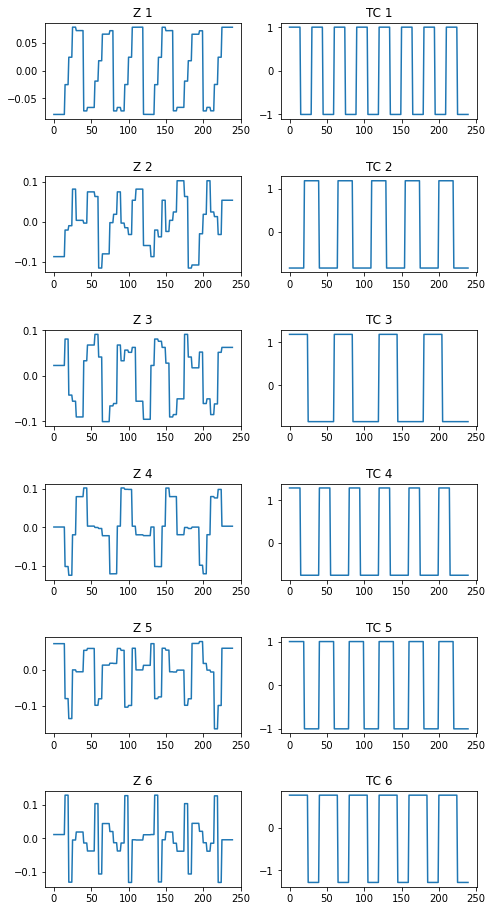

In [25]:
# plot Z and Tc
fig, ax = plt.subplots(6, 2, figsize=(15, 15))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)


for i in range(0, 6):
    ax[i, 0].plot(Z.T[i])
    ax[i, 0].set_title('Z ' + str(i+1))
    ax[i, 1].plot(TC.T[i])
    ax[i, 1].set_title('TC ' + str(i+1))

    
fig.savefig('./plots/Z_2.5.png')


In [26]:
# lasso regression using Z as regressor
rho = 0.001

# calculate APCR
step = 1/(np.linalg.norm(np.matmul(Z, Z.T))*1.1)  
thr = rho*N*step
Ao = np.zeros((nsrcs, 1))
A = np.zeros((nsrcs, 1))
A_PCR = np.zeros((nsrcs, x1*x2))

for k in range(0, x1*x2):
    A = Ao + step*(np.matmul(Z.T, X[:, k].reshape(240,1) - np.matmul(Z, Ao)))
    A = (1/(1+thr))*(np.sign(A)*np.maximum(np.repeat(0, nsrcs), abs(A)-thr)[:, 0].reshape(6, 1))
    for i in range(0, 10):
        Ao = A
        A = Ao + step*(np.matmul(Z.T, X[:, k].reshape(240,1) - np.matmul(Z, Ao)))
        A = (1/(1+thr))*(np.sign(A)*np.maximum(np.repeat(0, nsrcs), abs(A)-thr)[:, 0].reshape(6, 1))

    A_PCR[:, k] = A.reshape(6)

# calculate DPCR
D_PCR = np.matmul(X, A_PCR.T)


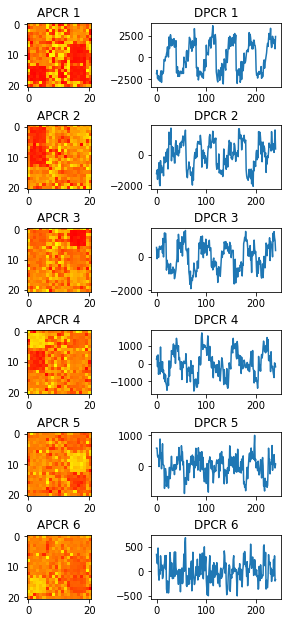

In [27]:
# plot the estimates of D and A
fig, ax = plt.subplots(6, 2, figsize=(10, 10))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)

reshaped_A_PCR = A_PCR.reshape(6, 21, 21, order='F')

for i in range(0, 6):
    ax[i, 0].imshow(reshaped_A_PCR[i], cmap='autumn')
    ax[i, 0].set_title('APCR ' + str(i+1))
    ax[i, 1].plot(D_PCR.T[i])
    ax[i, 1].set_title('DPCR ' + str(i+1))
    
fig.savefig('./plots/sources_2.5.png')
plt.show()